# Inteligência Computacional
## Homework SVM
### Equipe: Seek Learning
 - Danilo Nicioka
 - Micael Cori
 - Michael Costa
 - Pedro Rendeiro

## 1. Considere as SVMs abaixo

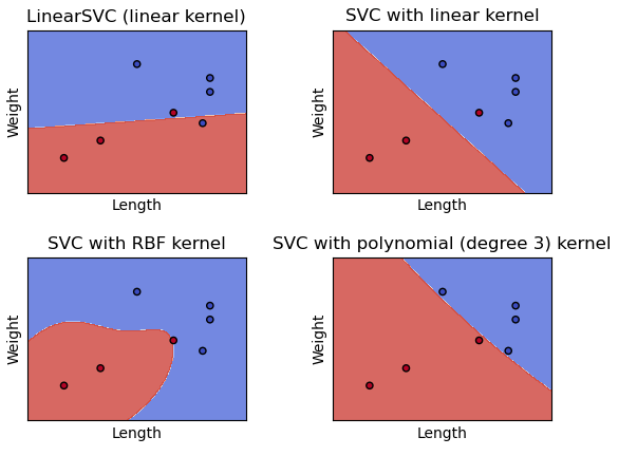

### a) Quantos erros cada SVM possui no conjunto de treino?

 - LinearSVC (linear kernel): 2 erros
 - SVC with linear kernel: 1 erro
 - SVC with RBF kernel: 1 erro
 - SVC with polynomial: 0 erro

### b) Qual a que lhe parece ser a melhor SVM? Por quê?

A SVM do canto superior direito (SVC com kernel linear) parece ser a mais adequada, pois, apesar de ter um erro, possui uma margem maior entre os conjuntos.

## 2. Complexidade
Você quer potencialmente aumentar o número de vetores de suporte, fazendo com que sua nova SVM seja um modelo mais “complexo”. Para isso, você deve aumentar ou diminuir o parâmetro “C” da classe SVC do scikit-learn?

Conforme o valor de "C" aumenta, a complexidade da SVM também aumenta. Portanto, neste caso, seria necessário **aumentar o parâmetro "C"**.

## 3. Custo computacional
Um classificador usa vetores de entrada com dimensão **K=5 “features”**. Após treinar uma **SVM linear**, o número de vetores de suporte foi de **450 exemplos (SVs)**. Neste caso, calcular o kernel linear corresponde a um produto interno entre dois vetores de dimensão K=5, cada, o que requer K multiplicações e K-1 adições. **Estime o fator** $ F = C_{original} \div C_{perceptron} $ **de redução do custo computacional da etapa de teste ao converter esta SVM linear para um perceptron**. Assuma que os custos $C_{original}$ e $C_{perceptron}$ correspondem ao número de multiplicações e adições usando-se, respectivamente, a SVM original com os 450 vetores de suporte e após sua conversão para perceptron.

## 4. Interpretação do resultado do projeto de SVMs

### Dados
Qntd de vetores de suporte por classe:
 - Classe 0: 1
 - Classe 1: 2

Vetores de suporte:
 - [1, 4]
 - [-2, 3]
 - [-2, -5]
 
Coeficientes duais $(\lambda)$: [-0.5, -0.3, 0.8]

Bias: -2

### a) Função de decisão para essa SVM

Forma geral: $f(z) = (\sum_{n=-0}^{N-1}\lambda_n K(z,x_n)) + b$

Sabendo que $b = -2$, que $N = 3$ e que a função de kernel linear é $K(z,x_n)\ =\ <z,x_n>$, temos:

$f(z) = (\sum_{n=0}^{2}\lambda_n <z,x_n>) -2$

### b) Função de decisão escrita como Perceptron

Forma geral: $f(z)\ =\ <z,w> +\ b$

Para converter a SVM Linear para a forma de Perceptron, é necessário determinar o **vetor de pesos w**.

$w = \sum_{n=0}^{2}\lambda_n x_n$<br>
$w = -0.5[1,4] -0.3[-2,3] + [-2,-5]$<br>
$w = [-0.5,-2] + [0.6,-0.9] + [-1.6,-4]$<br>
$w = [-1.5,-6.9]$

Assim, temos:

$f(z)\ =\ <z,[-1.5,-6.9]>\ - 2$

### c) Saída da função de decisão

Vetor de entrada: z = [0,0]<br>
Rótulo predito: $I(f(z) > 0)$  # I - função indicador

$f([0,0])\ =\ <[0,0],[-1.5,-6.9]>\ - 2$<br>
$f([0,0]) = 0 + 0 - 2$<br>
$f([0,0]) = -2$<br>
$y = I(-2 > 0)$<br>
$y = 0$<br>

## 6. SVM Linear no Scikit-learn

**Dados**
 - C = 1
 - Normalizar dados para que tenham média 0 e variância 1

### a) Treine a SVM com o conjunto de treino indicado no arquivo dataset_train.txt

**Carregando dataset**

In [1]:
'''
Adapted from ak_svm_prova1.py
'''

from os import path
import numpy as np


def load_train_dataset():
    #from numpy import genfromtxt
    my_data = np.genfromtxt(path.join('datasets','dataset_train.txt'), delimiter=',')
    X = my_data[:,:2] # fish length and weight
    y = np.ravel(my_data[:,2:],order='C') #convert column vector into 1D array
    feature_names = ('Length', 'Weight') #x and y
    return X,y,feature_names

X, y, feature_names = load_train_dataset()
print('Original training set:')
print(X)

Original training set:
[[ 0.e+00 -4.e+00]
 [-1.e+03  2.e+00]
 [ 3.e+03  3.e+00]
 [-5.e+03 -6.e+00]
 [-4.e+03 -5.e+00]
 [-2.e+03 -2.e+00]]


**Normalização (standardization)**

In [2]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)
print('Conjunto de treino normalizado')
print(X_scaled)
print(X_scaled.mean(axis=0), '-> Média ~ 0')
print(X_scaled.std(axis=0), '-> Desvio padrão = 1')

Conjunto de treino normalizado
[[ 0.57035183 -0.58554004]
 [ 0.19011728  1.17108009]
 [ 1.71105548  1.46385011]
 [-1.33082093 -1.17108009]
 [-0.95058638 -0.87831007]
 [-0.19011728  0.        ]]
[-4.62592927e-18  1.85037171e-17] -> Média ~ 0
[1. 1.] -> Desvio padrão = 1


**Treino**

Note que a etapa de normalização foi inserida dentro de um pipeline

In [3]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

linear_kernel_svm_clf = Pipeline([
                        ("scaler", StandardScaler()),
                        ("svm_clf", SVC(kernel='linear', C=1))
])

linear_kernel_svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=1, kernel='linear'))])

### b) Indique o desempenho do modelo SVM no conjunto de teste dataset_test.txt

In [4]:
def load_test_dataset():
    #from numpy import genfromtxt
    my_data = np.genfromtxt(path.join('datasets','dataset_test.txt'), delimiter=',')
    X = my_data[:,:2] # fish length and weight
    y = np.ravel(my_data[:,2:],order='C') #convert column vector into 1D array
    feature_names = ('Length', 'Weight') #x and y
    return X,y,feature_names

X_test, y_test, feature_names = load_test_dataset()
print("Score:", linear_kernel_svm_clf.score(X_test,y_test))

Score: 1.0


Obtivemos 100% de acertos no conjunto de teste.

### c) Conversão de SVM para Perceptron

In [5]:
def convert_linear_SVM_to_perceptron(support_vectors, dual_coef):
    dual_coef = np.ravel(dual_coef,order='C') #convert to a 1D vector
    num_support_vectors = len(dual_coef)
    if support_vectors.shape[0] != num_support_vectors:
        raise Exception('support_vectors.shape[0] != num_support_vectors')
    input_space_dimension = support_vectors.shape[1]
    perceptron_weights = np.zeros((input_space_dimension))
    for sv in range(num_support_vectors):
        perceptron_weights += dual_coef[sv] * support_vectors[sv]
    return perceptron_weights

def calculate_intercept(perceptron_weights,support_vectors,support_vector_indices,labels):
    '''
    https://stats.stackexchange.com/questions/211310/deriving-the-intercept-term-in-a-linearly-separable-and-soft-margin-svm
    '''
    num_support_vectors = support_vectors.shape[0]
    #input_space_dimension = support_vectors.shape[1]
    max_negative = -1e30
    min_positive = 1e30
    for i in range(num_support_vectors):
        #note that labels has all training examples, not only support vectors,
        #so use support_vector_indices to get the proper index in training set
        this_label = labels[support_vector_indices[i]]
        this_inner_product = np.inner(perceptron_weights, support_vectors[i])
        if this_label > 0:
            if this_inner_product < min_positive:
                min_positive = this_inner_product
        else:
            if this_inner_product > max_negative:
                max_negative = this_inner_product
    return -(max_negative+min_positive)/2.0

def predict_perceptron(data, weights, bias):
    if len(data) != len(weights):
        raise Exception('len(data) != len(weights)')
    activation = bias
    print(activation)
    for i in range(len(data)):
        activation += weights[i] * data[i]
        print(activation)
    return 1.0 if activation >= 0.0 else 0.0

def perceptron_score(predicted_labels, real_labels):
    if len(predicted_labels) != len(real_labels):
        raise Exception('len(predicted_labels) != len(real_labels)')
    x = []
    for i in range(len(real_labels)):
        x.append(real_labels[i] == real_labels[i])
    return np.sum(x) / len(real_labels)

In [6]:
svm = linear_kernel_svm_clf.named_steps['svm_clf']
perceptron_weights = convert_linear_SVM_to_perceptron(svm.support_vectors_, svm.dual_coef_)
print('Estimated perceptron_weights =', perceptron_weights)
bias = calculate_intercept(perceptron_weights,svm.support_vectors_,svm.support_,y)
print('Estimated bias =', bias)
print('Sklearn bias =', svm.intercept_[0])

Estimated perceptron_weights = [-1.24413145 -0.28340857]
Estimated bias = 0.153557348553638
Sklearn bias = -0.43157498229825


**Aviso: inconsistência no bias**

In [180]:
predict_array = []
for i in range(X_test_scaled.shape[0]):
    predict_array.append(predict_perceptron(X_test_scaled[i,:], perceptron_weights, svm.intercept_[0]))
# predict_array.append(predict(X_test_scaled[0], perceptron_weights, svm.intercept_))

print("Result:", predict_array)

-0.43157498229825
-1.6142293866612694
-1.6142293866612694
-0.43157498229825
-0.6681058631708539
-0.8340529278087856
-0.43157498229825
1.697202945555185
1.697202945555185
-0.43157498229825
1.2241411838099772
1.2241411838099772
Result: [0.0, 0.0, 1.0, 1.0]


In [181]:
predict_array = []
for i in range(X_test_scaled.shape[0]):
    predict_array.append(predict(X_test_scaled[i,:], perceptron_weights, bias))
# predict_array.append(predict(X_test_scaled[0], perceptron_weights, svm.intercept_))

print("Result:", predict_array)

0.153557348553638
-1.0290970558093813
-1.0290970558093813
0.153557348553638
-0.08297353231896584
-0.2489205969568976
0.153557348553638
2.282335276407073
2.282335276407073
0.153557348553638
1.8092735146618653
1.8092735146618653
Result: [0.0, 0.0, 1.0, 1.0]


In [182]:
ps = perceptron_score(predict_array,y_test)
ps

1.0

**Custo computacional**
Com base no raciocínio desenvolvido na **questão 3**, sabemos o custo computacional do Perceptron e do SVM Kernel Linear

Perceptron:
 - $C_{Perceptron} = 2k$<br>
 - $C_{Perceptron} = 2\times2$<br>
 - $C_{Perceptron} = 4$<br>
 
SVM Kernel Linear:
 - $C_{Kernel\_Linear} = nsv(2k)+1$<br>
 - $C_{Kernel\_Linear} = 4(4)+1$<br>
 - $C_{Kernel\_Linear} = 17$<br>
 
Redução de custo computacional:
 - $F = \frac{C_{Kernel\_Linear}}{C_{Perceptron}}$<br>
 - $F = \frac{17}{4}$<br>
 - $F = 4.25$<br>
 
Obs.:
 - $k = \text{# features} = 2$<br>
 - $nsv = \text{# support vectors} = 4$

**Conclusão**

Obtivemos um algoritmo $4.25\times$ mais rápido, mantendo a mesma taxa de acertos que o anterior.

## 7. SVM Gaussiana no Scikit-learn

### a) Treino e validação

Observe o resultado no conjunto de validação para as seguintes variações de hiperparâmetros:
 - $C = [0.01, 1, 100]$
 - $\gamma = [0.5, 1]$

**Carregando dataset**

In [188]:
'''
Adapted from ak_svm_prova1.py
'''

from os import path
import numpy as np


def load_train_dataset():
    #from numpy import genfromtxt
    my_data = np.genfromtxt(path.join('datasets','dataset_train.txt'), delimiter=',')
    X = my_data[:,:2] # fish length and weight
    y = np.ravel(my_data[:,2:],order='C') #convert column vector into 1D array
    feature_names = ('Length', 'Weight') #x and y
    return X,y,feature_names

X, y, feature_names = load_train_dataset()
print('Original training set:')
print(X)

Original training set:
[[ 0.e+00 -4.e+00]
 [-1.e+03  2.e+00]
 [ 3.e+03  3.e+00]
 [-5.e+03 -6.e+00]
 [-4.e+03 -5.e+00]
 [-2.e+03 -2.e+00]]


In [189]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)
print('Conjunto de treino normalizado')
print(X_scaled)
print(X_scaled.mean(axis=0), '-> Média ~ 0')
print(X_scaled.std(axis=0), '-> Desvio padrão = 1')

Conjunto de treino normalizado
[[ 0.57035183 -0.58554004]
 [ 0.19011728  1.17108009]
 [ 1.71105548  1.46385011]
 [-1.33082093 -1.17108009]
 [-0.95058638 -0.87831007]
 [-0.19011728  0.        ]]
[-4.62592927e-18  1.85037171e-17] -> Média ~ 0
[1. 1.] -> Desvio padrão = 1


**Treino**

Note que a etapa de normalização foi inserida dentro de um pipeline

In [136]:
# from sklearn.pipeline import Pipeline
# from sklearn.svm import SVC

# c = [0.01, 1, 100]
# g = [0.5, 1]
# rbf_kernel_svm_clf = []



# for j in range(len(c)):
# #     print('j =',j)
#     for k in range(len(g)):
# #         print('k =',k)
#         rbf_kernel_svm_clf.append(Pipeline([
#                                     ("scaler", StandardScaler()),
#                                     ("svm_clf", SVC(kernel='rbf', gamma=g[k], C=c[j]))
#         ]))

# # Treinando cada clf
# for i in range(len(rbf_kernel_svm_clf)):
#     rbf_kernel_svm_clf[i].fit(X,y)

**Treino e Validação**

In [190]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "svm"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [191]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

Saving figure moons_rbf_svc_plot


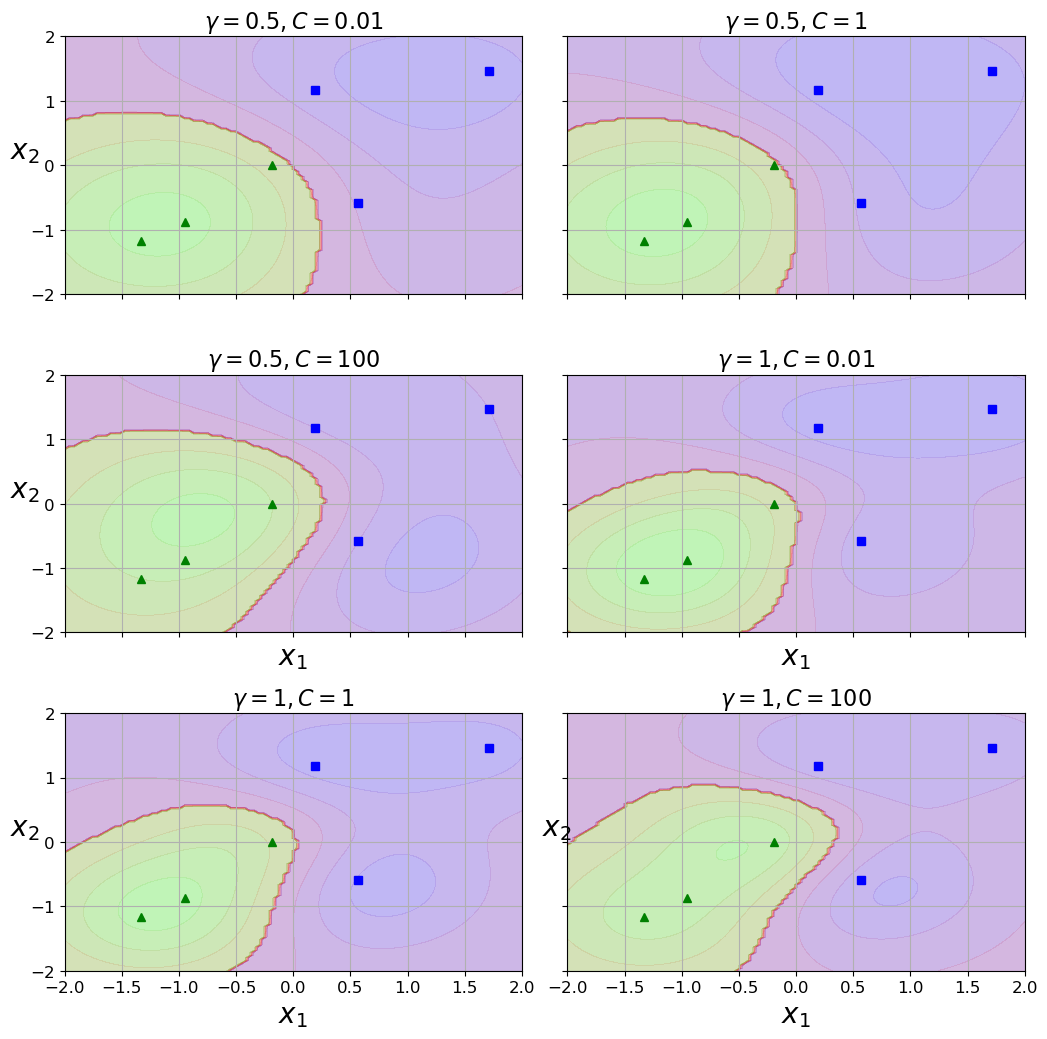

In [203]:
gamma1, gamma2 = 0.5, 1
C1, C2, C3 = 0.01, 1, 100
hyperparams = (gamma1, C1), (gamma1, C2), (gamma1, C3), (gamma2, C1), (gamma2, C2), (gamma2, C3)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf =SVC(kernel="rbf", gamma=gamma, C=C)
    rbf_kernel_svm_clf.fit(X_scaled, y)
    svm_clfs.append(rbf_kernel_svm_clf)

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10.5, 10.5), sharex=True, sharey=True)

for i, svm_clf in enumerate(svm_clfs):
    plt.sca(axes[i // 2, i % 2])
    plot_predictions(svm_clf, [-2, 2, -2, 2])
    plot_dataset(X_scaled, y, [-2, 2, -2, 2])
    gamma, C = hyperparams[i]
    plt.title(r"$\gamma = {}, C = {}$".format(gamma, C), fontsize=16)
    if i in (0, 1):
        plt.xlabel("")
    if i in (1, 3):
        plt.ylabel("")

save_fig("moons_rbf_svc_plot")
plt.show()

In [204]:
def load_val_dataset():
    #from numpy import genfromtxt
    my_data = np.genfromtxt(path.join('datasets','dataset_validation.txt'), delimiter=',')
    X = my_data[:,:2] # fish length and weight
    y = np.ravel(my_data[:,2:],order='C') #convert column vector into 1D array
    feature_names = ('Length', 'Weight') #x and y
    return X,y,feature_names

X_val, y_val, feature_names = load_val_dataset()
X_val_scaled = scaler.transform(X_val)
for i, svm_clf in enumerate(svm_clfs):
    print(f'Clf_{i}:',svm_clf.score(X_val_scaled,y_val))

Clf_0: 0.875
Clf_1: 0.875
Clf_2: 0.875
Clf_3: 0.625
Clf_4: 0.625
Clf_5: 0.875


### b) Descrição dos parâmetros

In [206]:
best_svm_clf = svm_clfs[5]
best_svm_clf

SVC(C=100, gamma=1)

In [217]:
'''
Gamma

É um parâmetro inversal à variância da distribuição gaussiana.
Quanto maior o gamma, menor a variância.
Quanto menor o gamma, maior a variância.

'''

best_svm_clf.gamma

1

In [210]:
# Qntd vetores de suporte
np.sum(best_svm_clf.n_support_)

5

In [214]:
# Índices dos vetores de suporte
best_svm_clf.support_

array([0, 1, 2, 3, 5], dtype=int32)

In [253]:
# Índices dos vetores de suporte
best_svm_clf.support_vectors_

array([[ 0.57035183, -0.58554004],
       [ 0.19011728,  1.17108009],
       [ 1.71105548,  1.46385011],
       [-1.33082093, -1.17108009],
       [-0.19011728,  0.        ]])

In [218]:
'''
Lambda

É o produto entre os coeficientes duais de cada exemplo do conjunto de treino e seus rótulos correspondentes
'''

best_svm_clf.dual_coef_

array([[-1.51053809, -1.05403106, -0.62900481,  1.16385489,  2.02971907]])

In [219]:
'''
Bias

Ajusta a posição do hiperplano separador entre as duas classes
'''

best_svm_clf.intercept_[0]

-0.2752687149384987

### c) Função de decisão

In [261]:
import math
import numpy as np

gamma = best_svm_clf.gamma
N = np.sum(best_svm_clf.n_support_)
SVs = best_svm_clf.support_vectors_
lbda = best_svm_clf.dual_coef_[0]
bias = best_svm_clf.intercept_[0]


def kernel_rbf(data,index):
#     print(SVs[index])
    if len(data) != SVs[index].shape[0]:
        raise Exception('len(data) != len(SVs)')
    dist = np.linalg.norm(data - SVs[index])
    return math.exp(-gamma*dist**2)

def my_decision_function(data):
    conf_scores = []
    for n in range(len(data)):
        decision = 0
        for i in range(N):
#             print(i)
            decision += lbda[i] * kernel_rbf(data[n],i)
        decision += bias
        conf_scores.append(decision)
    return conf_scores

In [262]:
def load_test_dataset():
    #from numpy import genfromtxt
    my_data = np.genfromtxt(path.join('datasets','dataset_test.txt'), delimiter=',')
    X = my_data[:2,:2] # fish length and weight
    y = np.ravel(my_data[:2,2:],order='C') #convert column vector into 1D array
    feature_names = ('Length', 'Weight') #x and y
    return X,y,feature_names

X_test, y_test, feature_names = load_test_dataset()
X_test_scaled = scaler.transform(X_test)
best_svm_clf.decision_function(X_test_scaled)

array([-0.84030932, -0.13190981])

In [263]:
my_decision_function(X_test_scaled)

[-0.8403093179122605, -0.1319098055769623]